<a href="https://colab.research.google.com/github/shamim-hussain/async_admm_consensus/blob/master/example_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asychronous ADMM for Consensus Optimization
This notebook demonstrates how to run and evaluate the python implementation of the asynchronous ADMM algorithm available at

https://github.com/shamim-hussain/async_admm_consensus

This notebook is runnable on [Google Colaboratory](https://colab.research.google.com)

## Cloning The repository

In [1]:
!git clone https://github.com/shamim-hussain/async_admm_consensus.git

%cd async_admm_consensus/

Cloning into 'async_admm_consensus'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 262 (delta 111), reused 199 (delta 56), pack-reused 0
Receiving objects: 100% (262/262), 18.06 MiB | 22.83 MiB/s, done.
Resolving deltas: 100% (111/111), done.
/content/async_admm_consensus


## Files Description



*   The main scripts are *mnist_avg.py* and *mnist_logistic.py* which are experiments designed to average the MNIST dataset and run Multiclass Logistic Regression on the MNIST dataset respectively.



>> You need to specify the process id when running these files. 
*   A *(process id) = (# of workers)* corresponds to the master
*   A process id from *0* to *(# of workers - 1)* are different workers

>> The results are generated in the logs directory.


*   The *run_workers.sh* bash script is a tool to spawn multiple processes including all workers and the master.
*   The *plotting_tool.py* file can be used to produce plots from the logs.
*   *mnist.npz* and *mnist_14.npz* are 28x28 and 14x14 versions of the MNIST dataset respectively.
*   *admm.py* and *tcp_server.py* are library files used by the main scripts.



In [2]:
!ls

admm.py		   mnist_14.npz       mnist.npz		run_workers.sh
example_run.ipynb  mnist_avg.py       plotting_tool.py	tcp_server.py
final_results	   mnist_logistic.py  README.md


In [3]:
!bash run_workers.sh --help

run_workers.sh script num_worker port beta S tau steps num_gpu worker_range


## Averaging MNIST
We will be running the *mnist_avg.py* file using *run_workers.sh*. We will use *N=2* workers (3 processes in total) and a single GPU (available on colab).
> NB: In a command line environment you can simply plug in the arguments to the script but for the sake of lucidity broke down each argurment and added comment.

In [4]:
script      = "mnist_avg.py"  # Script to be run
num_worker  = 2               # No. of workers
port        = 33348           # Port to be used for TCP communication
beta        = 10.0            # Value of beta parameter of admm
S           = 2               # Partial barrier parameter
tau         = 1               # Bounded delay parameter
steps       = 200             # Number of steps to run the algorithm
num_gpu     = 1               # Number of gpus to use, set = 0 for cpu only
worker_range= "0-2"           # Range of workers {0,1,2(master)}

!bash run_workers.sh $script $num_worker $port $beta $S $tau $steps $num_gpu $worker_range

----------------------------------
num_worker = 2
beta = 10.0
S = 2
tau = 1
steps = 200
num_gpu = 1
from = 0
to = 2
----------------------------------
Starting MASTER
Starting WORKER:0
Starting WORKER:1
[1]   Running                 python $script $num_worker $num_worker $port --beta $beta --S $S --tau $tau --steps $steps --device cuda:0 &
[2]-  Running                 python $script $num_worker $w_i $port --beta $beta --S $S --tau $tau --steps $steps --device cuda:$(expr $w_i % $num_gpu) &
[3]+  Running                 python $script $num_worker $w_i $port --beta $beta --S $S --tau $tau --steps $steps --device cuda:$(expr $w_i % $num_gpu) &
Worker:1 failed to connect to address ('localhost', 33348). Retrying in 1 second...
Started listening on address ('localhost', 33348)
Worker:0 connected to address ('localhost', 33348)
Connection 0 connected.
Worker:1 connected to address ('localhost', 33348)
Connection 1 connected.
Started computing!
Optimization Ended, calculating objective value

In [5]:
#@title The results have been generated in the log directory
!ls logs -R | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/'

   logs
   |-mnist_avg
   |---S=2 tau=1


### Viewing the results

Objective vs steps/wall_time

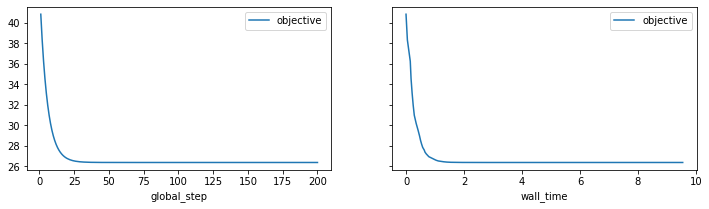

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


dataframe = pd.read_pickle('logs/mnist_avg/S=2 tau=1/logs.pkl')

fig = plt.figure(figsize=[12,3])

ax1, ax2 = fig.subplots(1,2,sharey=True)
dataframe.plot(x='global_step',y='objective',ax=ax1)
dataframe.plot(x='wall_time',y='objective',ax=ax2)

fig.show()

The result of averaging.

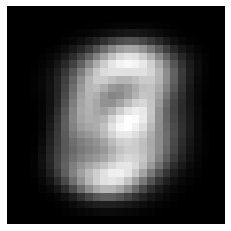

In [7]:
import numpy as np

avg = np.load('logs/mnist_avg/S=2 tau=1/results.npy')

fig = plt.figure()
plt.imshow(avg.reshape(28,28),cmap='gray')
plt.axis('off')
fig.show()

## MNIST Classification
Similiarly, we will be running the *mnist_logistic.py* file using *run_workers.sh*. We will use *N=2* workers (3 processes in total) and a single GPU (available on colab).

In [8]:
script      = "mnist_logistic.py"  # Script to be run
num_worker  = 2               # No. of workers
port        = 33349           # Port to be used for TCP communication
beta        = 1.0             # Value of beta parameter of admm
S           = 2               # Partial barrier parameter
tau         = 1               # Bounded delay parameter
steps       = 200             # Number of steps to run the algorithm
num_gpu     = 1               # Number of gpus to use, set = 0 for cpu only
worker_range= "0-2"           # Range of workers {0,1,2(master)}

!bash run_workers.sh $script $num_worker $port $beta $S $tau $steps $num_gpu $worker_range

----------------------------------
num_worker = 2
beta = 1.0
S = 2
tau = 1
steps = 200
num_gpu = 1
from = 0
to = 2
----------------------------------
Starting MASTER
Starting WORKER:0
Starting WORKER:1
[1]   Running                 python $script $num_worker $num_worker $port --beta $beta --S $S --tau $tau --steps $steps --device cuda:0 &
[2]-  Running                 python $script $num_worker $w_i $port --beta $beta --S $S --tau $tau --steps $steps --device cuda:$(expr $w_i % $num_gpu) &
[3]+  Running                 python $script $num_worker $w_i $port --beta $beta --S $S --tau $tau --steps $steps --device cuda:$(expr $w_i % $num_gpu) &
Started listening on address ('localhost', 33349)
Connection 0 connected.
Worker:0 connected to address ('localhost', 33349)
Worker:1 connected to address ('localhost', 33349)
Connection 1 connected.
Started computing!
Optimization Ended, calculating objective values.
Done!


KeyboardInterrupt: ignored

In [9]:
#@title The results have been generated in the log directory
!ls logs -R | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/'

   logs
   |-mnist_avg
   |---S=2 tau=1
   |-mnist_logistic
   |---S=2 tau=1


#### Checking The Classification Accuracy

In [10]:
import numpy as np

# Load the results
with np.load('logs/mnist_logistic/S=2 tau=1/results.npz') as file:
  w,b,xm,xd = file['w'], file['b'], file['xm'], file['xd']

# Load the dataset
with np.load('mnist_14.npz') as file:
  X_train, Y_train, X_test, Y_test = file['X_train'], file['Y_train'],\
                                      file['X_test'], file['Y_test']

# Rescale and reshape
X_train = X_train.reshape(-1,14*14).astype('float32')/255
X_test = X_test.reshape(-1,14*14).astype('float32')/255

# Normalize
X_train = (X_train - xm)/xd
X_test = (X_test - xm)/xd

# Produce predictions
Y_train_pred = np.argmax( X_train @ w + b , axis= -1)
Y_test_pred = np.argmax( X_test @ w + b , axis= -1)



# Get accuracies
train_acc = np.sum(Y_train==Y_train_pred)/len(Y_train)
test_acc = np.sum(Y_test==Y_test_pred)/len(Y_test)

print(f'Training Accuracy \t = {train_acc*100:.2f} %')
print(f'Test Accuracy \t = {test_acc*100:.2f} %')

Training Accuracy 	 = 91.72 %
Test Accuracy 	 = 91.78 %


## Using the Plotting Tool

Specify the designated folder and run the tool

In [11]:
!python plotting_tool.py 'logs/mnist_logistic'

The plots have been generated in the figures directory.

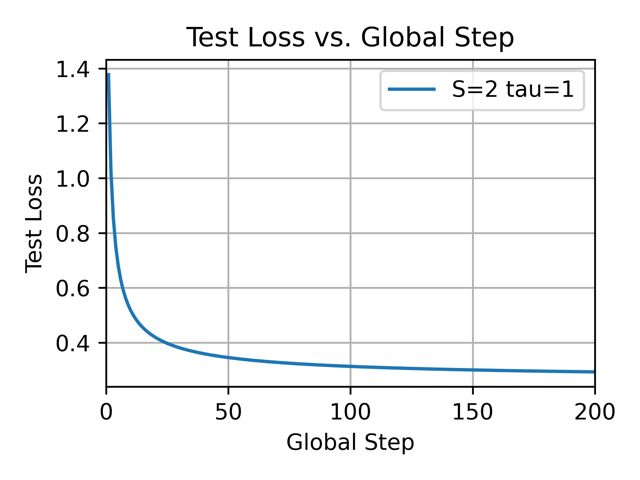

In [12]:
from PIL import Image
img = Image.open('logs/mnist_logistic/Figures/Test Loss vs. Global Step.png')
img.resize((640,480))